In [1]:
# 📚 Basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

<h1 style="color: #07caa6;">01 | Data Extraction</h1>

In [2]:
df = pd.read_csv('after_cleaning.csv')

<h1 style="color: #07caa6;">02 | Machine Learning</h1>

In [3]:
# Cluster Food Groups and give suggestion to replace a food with something similar (group similar food items together based on their nutritional profiles:)

In [4]:
# Selecting only Macros
df1 = df[['FoodName','FoodGroup','Desc','Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g']]

In [5]:
# Select the relevant features for clustering
X = df1.drop(columns=['FoodName','FoodGroup','Desc'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=11, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the cluster assignments
print(df1[['FoodGroup', 'Cluster']].head(10))

/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                FoodGroup  Cluster
0  Dairy and Egg Products        3
1  Dairy and Egg Products        3
2  Dairy and Egg Products        3
3  Dairy and Egg Products        5
4  Dairy and Egg Products        5
5  Dairy and Egg Products        5
6  Dairy and Egg Products        5
7  Dairy and Egg Products        5
8  Dairy and Egg Products        5
9  Dairy and Egg Products        5


/var/folders/0p/4pk339j10111qhkt__jby28r0000gn/T/ipykernel_8878/2489871526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster'] = kmeans.fit_predict(X_scaled)


/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/0p/4pk339j10111qhkt__jby28r0000gn/T/ipykernel_8878/3047230497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster'] = kmeans.fit_predict(X_pca)


                 Desc  Cluster
0              salted        9
1  whipped, with salt        9
2           anhydrous        4
3                blue        2
4               brick        2
5                brie        2
6           camembert        2
7             caraway        2
8             cheddar        2
9            cheshire        2


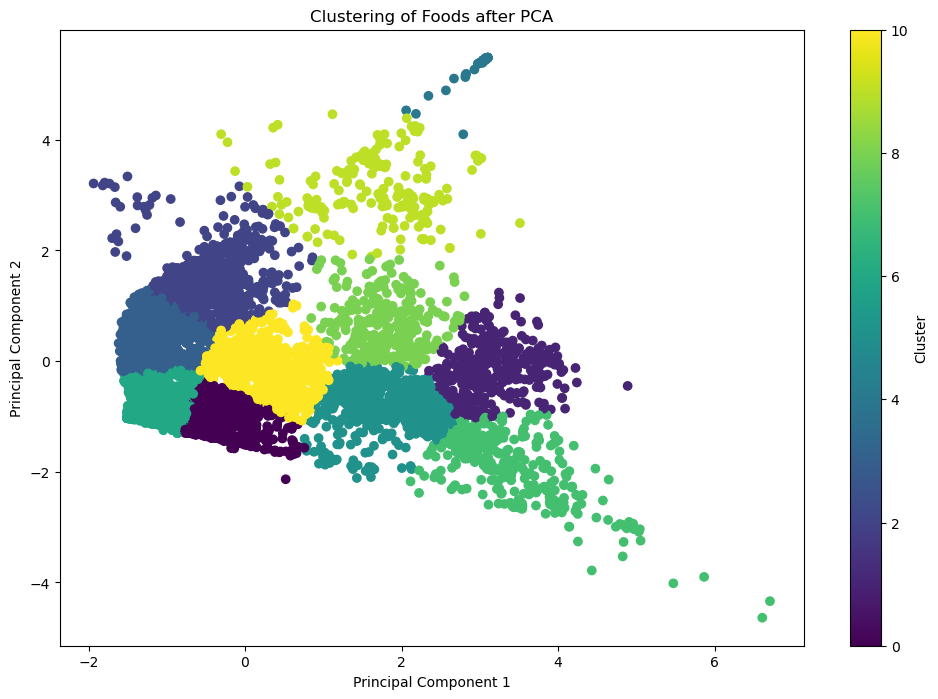

In [6]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization, can adjust based on needs
X_pca = pca.fit_transform(X_scaled)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=11, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X_pca)

# Analyze the cluster assignments
print(df1[['Desc', 'Cluster']].head(10))

# Optionally, visualize the PCA-reduced data with cluster assignments
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df1['Cluster'], cmap='viridis')
plt.title('Clustering of Foods after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [7]:
# User selection
selected_food = input("Enter a food name:")

        # Find the cluster of the selected food
selected_cluster = df1[df1['Desc'] == selected_food]['Cluster'].values[0]

        # Find foods in the same cluster
similar_foods_df1 = df1[df1['Cluster'] == selected_cluster]

print(selected_cluster)

Enter a food name:butter
8


/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


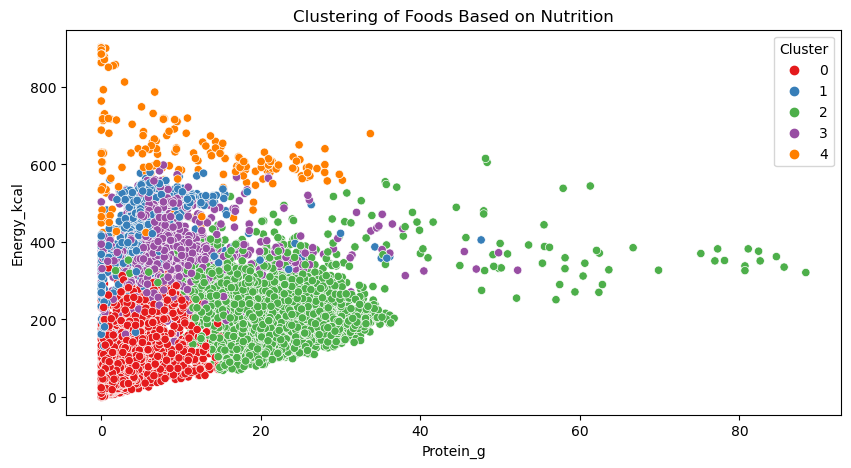

   Energy_kcal  Protein_g      Fat_g     Carb_g    Sugar_g   Fiber_g
0    84.984955   2.980343   2.360951  13.151242   4.063361  1.500768
1   418.123894   5.598673  14.110531  68.874728  43.169949  2.507965
2   210.667840  22.635757  11.723261   2.928077   0.440550  0.215456
3   372.910184   9.889286   9.841460  64.967001   6.315638  7.459663
4   700.492447   7.568701  73.448701   6.973414   1.337069  2.382477


In [8]:
# 1. Data Preparation (selecting relevant columns)
features = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g']
X = df[features]

# 2. Standardization of the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Applying K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
kmeans.fit(X_scaled)

# 4. Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# 5. Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Protein_g', y='Energy_kcal', hue='Cluster', data=df, palette='Set1')
plt.title('Clustering of Foods Based on Nutrition')
plt.show()

# 6. (Optional) Analyzing cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)


/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

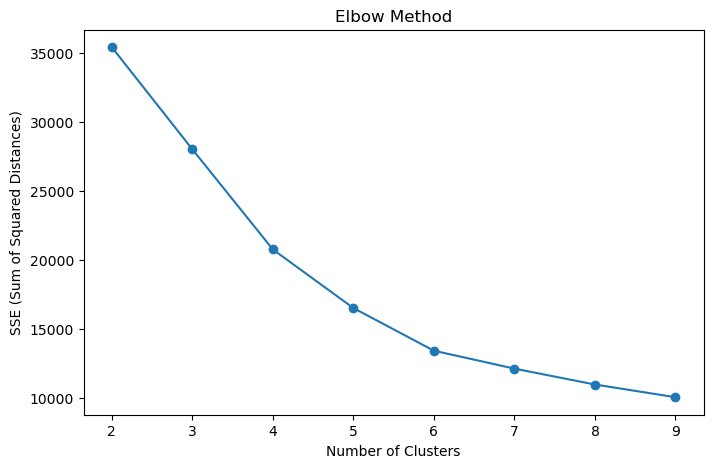

In [9]:
from sklearn.metrics import silhouette_score
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.show()

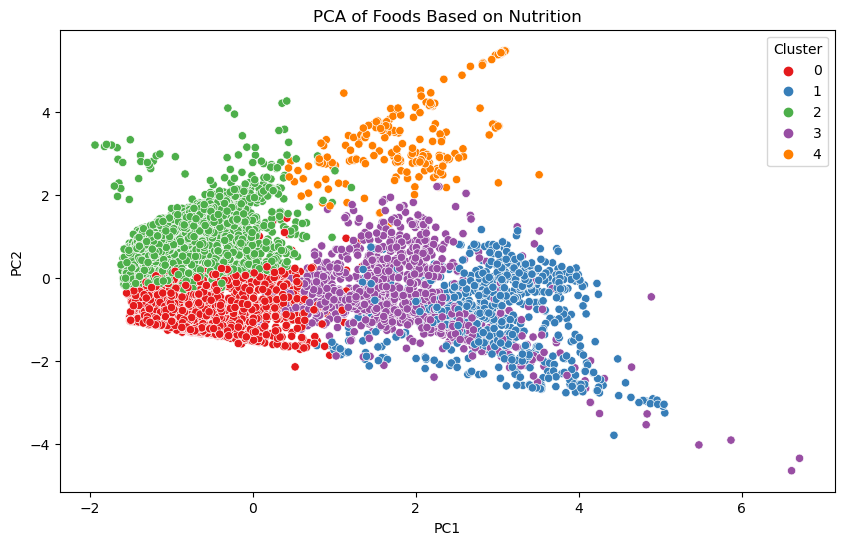

In [10]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Scatter plot of the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set1')
plt.title('PCA of Foods Based on Nutrition')
plt.show()

In [11]:
from scipy import stats

# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(X_scaled))

# Set a threshold for z-scores (commonly 3, meaning 3 standard deviations away from the mean)
outliers = np.where(z_scores > 3)

# Investigate the outliers
outlier_indices = np.unique(outliers[0])  # Row indices of outliers
outlier_data = df.iloc[outlier_indices]
print(outlier_data)

                FoodName                        Desc                FoodGroup  \
0                 butter                      salted   Dairy and Egg Products   
1                 butter          whipped, with salt   Dairy and Egg Products   
2             butter oil                   anhydrous   Dairy and Egg Products   
62      cream substitute                    powdered   Dairy and Egg Products   
63       dessert topping                    powdered   Dairy and Egg Products   
...                  ...                         ...                      ...   
8599                 oil     corn, peanut, and olive            Fats and Oils   
8600          sweeteners  tabletop, fructose, liquid                   Sweets   
8602       celery flakes                       dried               Vegetables   
8611  vital wheat gluten                    No_descr  Cereal Grains and Pasta   
8615               syrup                        Cane                   Sweets   

      Energy_kcal  Protein_

In [12]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
outliers = df[((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)

                FoodName                                               Desc  \
0                 butter                                             salted   
1                 butter                                 whipped, with salt   
2             butter oil                                          anhydrous   
8                 cheese                                            cheddar   
16                cheese                                              cream   
...                  ...                                                ...   
8608            puddings    chocolate flavor, low calorie, regular, dry mix   
8609            puddings  all flavors except chocolate, low calorie, reg...   
8610            puddings  all flavors except chocolate, low calorie, ins...   
8611  vital wheat gluten                                           No_descr   
8615               syrup                                               Cane   

                    FoodGroup  Energy_kcal  Protein

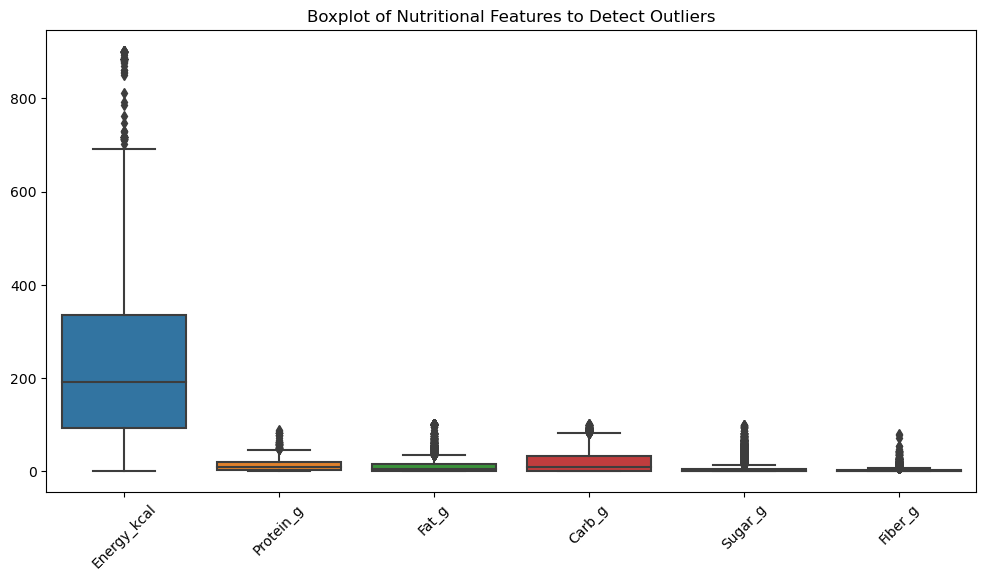

In [13]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features])
plt.title('Boxplot of Nutritional Features to Detect Outliers')
plt.xticks(rotation=45)
plt.show()

In [14]:
df_cleaned = df.drop(outlier_indices)


In [15]:
# Extract features from the cleaned DataFrame
X_cleaned = df_cleaned[features]

# Standardize the cleaned features
scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

In [16]:
df.head()

,FoodName,Desc,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitB6_mg,...,Magnesium_mg,Manganese_mg,Phosphorus_mg,Zinc_mg,VitA_mg,VitB12_mg,Folate_mg,Copper_mg,Selenium_mg,Cluster
0,butter,salted,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,0.003,...,2.0,0.000,24.0,0.09,0.684,0.00017,0.003,0.000000,0.0010,4
1,butter,"whipped, with salt",Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,0.003,...,2.0,0.004,23.0,0.05,0.684,0.00013,0.003,0.000016,0.0010,4
2,butter oil,anhydrous,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,0.001,...,0.0,0.000,3.0,0.01,0.840,0.00001,0.000,0.000001,0.0000,4
3,cheese,blue,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,0.166,...,23.0,0.009,387.0,2.66,0.198,0.00122,0.036,0.000040,0.0145,2
4,cheese,brick,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,0.065,...,24.0,0.012,451.0,2.60,0.292,0.00126,0.020,0.000024,0.0145,2


In [17]:
df.to_csv('cluster.csv', index = False)